# Project - Kraftwerk

## Master Thesis

Clemens Wöhrer

# Teufelmühle - daily Prediction

---

# Install and Load Packages

In [1]:
!pip install --upgrade pip
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install statsmodels
!pip install sklearn
!pip install plotly
!pip install pmdarima
!pip install ipylab

     |████████████████████████████████| 1.7 MB 24.9 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
     |████████████████████████████████| 11.5 MB 22.5 MB/s            
     |████████████████████████████████| 11.3 MB 17.1 MB/s            
     |████████████████████████████████| 3.1 MB 27.5 MB/s            
     |████████████████████████████████| 884 kB 26.8 MB/s            
     |████████████████████████████████| 1.2 MB 26.7 MB/s            
     |████████████████████████████████| 292 kB 27.2 MB/s            
     |████████████████████████████████| 9.9 MB 15.1 MB/s            
     |████████████████████████████████| 233 kB 28.3 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 25.9 MB 23.5 MB/s            
     |████████████████████████████████| 306 kB 25.9 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.

     |████████████████████████████████| 25.3 MB 23.9 MB/s            
     |████████████████████████████████| 1.5 MB 24.0 MB/s            
     |████████████████████████████████| 1.9 MB 26.8 MB/s            
     |████████████████████████████████| 822 kB 25.1 MB/s            
     |████████████████████████████████| 121 kB 26.5 MB/s            
     |████████████████████████████████| 1.6 MB 26.4 MB/s            
     |████████████████████████████████| 243 kB 25.9 MB/s            


In [2]:
%run functions.ipynb

In [3]:
np.random.seed(1234)
tf.random.set_seed(1234)

---

# Load Data

In [4]:
#Load folders
#lpd = Path("../Data/Lastprofildaten")
#wasser = Path("../Data/Wasserdaten")
#wetter = Path("../Data/Wetterdaten")
output = Path("../Data/Outputdaten")
forecast = Path("../Data/Forecast")

#Load csv names 
#mm_data = get_files(lpd, 'Lastprofil_Magerlmühle_*.csv')
#ps_data = get_files(lpd, 'Lastprofil_Pürnstein_*.csv')
#tm_data = get_files(lpd, 'Lastprofil_Teufelmühle_*.csv')
#wetter_files = get_files(wetter, '*.csv')
#wasser_files = get_files(wasser, '*.csv')

#Load dataframes from pickle
#mm_all = pd.read_pickle(os.path.join(output, "mm_all.pkl"))
#pm_all = pd.read_pickle(os.path.join(output, "pm_all.pkl"))
#tm_all = pd.read_pickle(os.path.join(output, "tm_all.pkl"))

In [5]:
data = pd.read_pickle(os.path.join(output, "mm_all.pkl"))

In [6]:
# Selecting Data greater than date 2010-07-01
data = data[data['timestamp'] >= '2010-07-01 00:00:00']

In [7]:
data.head()

timestamp       kw  Temperature  Growing_Degree_Days  \
8760 2010-07-01 00:00:00  147.021     19.87972             0.411655   
8761 2010-07-01 01:00:00  140.676     19.29972             0.387488   
8762 2010-07-01 02:00:00  138.828     18.85972             0.369155   
8763 2010-07-01 03:00:00  134.010     18.44972             0.352072   
8764 2010-07-01 04:00:00  134.766     18.13972             0.339155   

      Precipitation_Total  Snowfall_Amount  Relative_Humidity  Wind_Speed  \
8760                  0.0              0.0               70.0    4.104631   
8761                  0.0              0.0               69.0    4.334974   
8762                  0.0              0.0               69.0    4.104631   
8763                  0.0              0.0               71.0    4.334974   
8764                  0.0              0.0               73.0    4.610250   

      Wind_Direction  Wind_Gust  ...  Diffuse_Shortwave_Radiation  \
8760       52.125000       4.68  ...                          0.0   
8761       41.633530       4.68  ...                          0.0   
8762       52.125000       4.32  ...                          0.0   
8763       48.366455       4.32  ...                          0.0   
8764       51.340180       4.32  ...                          0.0   

      Mean_Sea_Level_Pressure  Evapotranspiration  \
8760                   1018.9                 0.0   
8761                   1018.8                 0.0   
8762                   1018.7                 0.0   
8763                   1018.5                 0.0   
8764                   1018.6                 0.0   

      FAO_Reference_Evapotranspiration  Temperature  Soil_Temperature  \
8760                          0.006250        12.69         18.550018   
8761                          0.007693        11.69         17.940002   
8762                          0.006324        11.27         17.350006   
8763                          0.006055        10.97         16.790009   
8764                          0.005873        10.78         16.260010   

      Soil_Moisture  Vapor_Pressure_Deficit  waterlevel  watertemperature  
8760          0.234                6.797056     142.000              15.3  
8761          0.234                6.774275     140.650              15.3  
8762          0.234                6.590325     140.000              15.3  
8763          0.234                6.008495     139.725              15.3  
8764          0.234                5.486001     139.800              15.3  

[5 rows x 28 columns]

# Previous KW values to be used as features.

By moving KW values on certain lags, such as 1(move by 1 hour), 24(move by 1 day), 48(move by 2 days) and so on till move by a week, we have create few more features which are directly related to kw. We are interested to know that how these past value will affect present and future KW values. 


In [8]:
pp = data.set_index('timestamp')
pp["kw_1"] = pp["kw"].diff(24)
pp["kw_2"] = pp["kw"].diff(24*2)
pp["kw_3"] = pp["kw"].diff(24*3)
pp["kw_4"] = pp["kw"].diff(24*4)
pp["kw_5"] = pp["kw"].diff(24*5)
pp["kw_6"] = pp["kw"].diff(24*6)
pp["kw_7"] = pp["kw"].diff(24*7)
pp["kw_8"] = pp["kw"].diff(24*8)

---

# Data Info

In [9]:
# Checking Missing values in kw:

pp.query('kw != kw')

kw  Temperature  Growing_Degree_Days  \
timestamp                                                   
2011-03-27 02:00:00 NaN     6.469721                  0.0   
2012-03-25 02:00:00 NaN     8.469721                  0.0   
2013-03-31 02:00:00 NaN     3.609721                  0.0   
2014-03-30 02:00:00 NaN     6.939721                  0.0   
2018-03-25 02:00:00 NaN    -0.280279                  0.0   
2019-03-31 02:00:00 NaN     7.979721                  0.0   
2020-03-29 02:00:00 NaN     6.109721                  0.0   
2021-03-28 02:00:00 NaN     1.829721                  0.0   

                     Precipitation_Total  Snowfall_Amount  Relative_Humidity  \
timestamp                                                                      
2011-03-27 02:00:00                  0.0              0.0               81.0   
2012-03-25 02:00:00                  0.0              0.0               72.0   
2013-03-31 02:00:00                  1.1              0.0               89.0   
2014-03-30 02:00:00                  0.0              0.0               72.0   
2018-03-25 02:00:00                  0.0              0.0               82.0   
2019-03-31 02:00:00                  0.0              0.0               65.0   
2020-03-29 02:00:00                  0.0              0.0               76.0   
2021-03-28 02:00:00                  0.0              0.0               78.0   

                     Wind_Speed  Wind_Direction  Wind_Gust  Cloud_Cover_Total  \
timestamp                                                                       
2011-03-27 02:00:00   11.457958       43.726974   7.200000         100.000000   
2012-03-25 02:00:00   12.682018       34.592270  15.840000           0.000000   
2013-03-31 02:00:00   38.047756       32.637497  43.199997         100.000000   
2014-03-30 02:00:00   14.799459       85.815090  13.679999           0.000000   
2018-03-25 02:00:00   19.110542       86.760300  30.960001           4.800000   
2019-03-31 02:00:00    7.208994        2.862411  13.679999           9.900001   
2020-03-29 02:00:00   18.681883       25.083572  20.880001          10.000000   
2021-03-28 02:00:00    9.220499      308.659820  20.160000         100.000000   

                     ...  waterlevel  watertemperature  kw_1  kw_2  kw_3  \
timestamp            ...                                                   
2011-03-27 02:00:00  ...     140.650             5.350   NaN   NaN   NaN   
2012-03-25 02:00:00  ...     183.350             6.050   NaN   NaN   NaN   
2013-03-31 02:00:00  ...     138.200             3.650   NaN   NaN   NaN   
2014-03-30 02:00:00  ...     122.550             7.950   NaN   NaN   NaN   
2018-03-25 02:00:00  ...     136.400             3.550   NaN   NaN   NaN   
2019-03-31 02:00:00  ...     159.900             6.575   NaN   NaN   NaN   
2020-03-29 02:00:00  ...     142.175             6.875   NaN   NaN   NaN   
2021-03-28 02:00:00  ...     136.700             4.850   NaN   NaN   NaN   

                     kw_4  kw_5  kw_6  kw_7  kw_8  
timestamp                                          
2011-03-27 02:00:00   NaN   NaN   NaN   NaN   NaN  
2012-03-25 02:00:00   NaN   NaN   NaN   NaN   NaN  
2013-03-31 02:00:00   NaN   NaN   NaN   NaN   NaN  
2014-03-30 02:00:00   NaN   NaN   NaN   NaN   NaN  
2018-03-25 02:00:00   NaN   NaN   NaN   NaN   NaN  
2019-03-31 02:00:00   NaN   NaN   NaN   NaN   NaN  
2020-03-29 02:00:00   NaN   NaN   NaN   NaN   NaN  
2021-03-28 02:00:00   NaN   NaN   NaN   NaN   NaN  

[8 rows x 35 columns]

In [10]:
# Replace Null-Values with forward fill and then backward fill
data_sum = pp.resample("D").sum()
pp=pp.fillna(method="pad")
pp=pp.fillna(method="bfill")
# Methode:
#  pad = forwardfill method


In [11]:
pp.head(20)

kw  Temperature  Growing_Degree_Days  \
timestamp                                                        
2010-07-01 00:00:00  147.021    19.879720             0.411655   
2010-07-01 01:00:00  140.676    19.299720             0.387488   
2010-07-01 02:00:00  138.828    18.859720             0.369155   
2010-07-01 03:00:00  134.010    18.449720             0.352072   
2010-07-01 04:00:00  134.766    18.139720             0.339155   
2010-07-01 05:00:00  132.090    17.749722             0.322905   
2010-07-01 06:00:00  124.341    17.999722             0.333322   
2010-07-01 07:00:00  127.245    19.579721             0.399155   
2010-07-01 08:00:00  130.533    22.129720             0.505405   
2010-07-01 09:00:00  128.241    23.569721             0.565405   
2010-07-01 10:00:00  127.473    24.509722             0.604572   
2010-07-01 11:00:00  127.218    25.049720             0.627072   
2010-07-01 12:00:00  117.864    25.429722             0.642905   
2010-07-01 13:00:00  122.412    25.699720             0.654155   
2010-07-01 14:00:00  122.907    25.899721             0.662488   
2010-07-01 15:00:00  116.562    26.049720             0.668738   
2010-07-01 16:00:00  121.854    26.049720             0.668738   
2010-07-01 17:00:00  119.181    25.879720             0.661655   
2010-07-01 18:00:00  125.283    25.719720             0.654988   
2010-07-01 19:00:00  123.291    25.339722             0.639155   

                     Precipitation_Total  Snowfall_Amount  Relative_Humidity  \
timestamp                                                                      
2010-07-01 00:00:00                  0.0              0.0               70.0   
2010-07-01 01:00:00                  0.0              0.0               69.0   
2010-07-01 02:00:00                  0.0              0.0               69.0   
2010-07-01 03:00:00                  0.0              0.0               71.0   
2010-07-01 04:00:00                  0.0              0.0               73.0   
2010-07-01 05:00:00                  0.0              0.0               74.0   
2010-07-01 06:00:00                  0.0              0.0               76.0   
2010-07-01 07:00:00                  0.0              0.0               77.0   
2010-07-01 08:00:00                  0.0              0.0               69.0   
2010-07-01 09:00:00                  0.0              0.0               61.0   
2010-07-01 10:00:00                  0.0              0.0               57.0   
2010-07-01 11:00:00                  0.0              0.0               50.0   
2010-07-01 12:00:00                  0.0              0.0               49.0   
2010-07-01 13:00:00                  0.0              0.0               48.0   
2010-07-01 14:00:00                  0.0              0.0               48.0   
2010-07-01 15:00:00                  0.0              0.0               47.0   
2010-07-01 16:00:00                  0.0              0.0               47.0   
2010-07-01 17:00:00                  0.0              0.0               47.0   
2010-07-01 18:00:00                  0.0              0.0               47.0   
2010-07-01 19:00:00                  0.0              0.0               49.0   

                     Wind_Speed  Wind_Direction  Wind_Gust  Cloud_Cover_Total  \
timestamp                                                                       
2010-07-01 00:00:00    4.104631       52.125000       4.68                8.1   
2010-07-01 01:00:00    4.334974       41.633530       4.68                8.0   
2010-07-01 02:00:00    4.104631       52.125000       4.32                0.0   
2010-07-01 03:00:00    4.334974       48.366455       4.32                0.0   
2010-07-01 04:00:00    4.610250       51.340180       4.32                0.9   
2010-07-01 05:00:00    4.510787       61.389540       3.96                3.9   
2010-07-01 06:00:00    4.610250       38.659805       3.60                2.1   
2010-07-01 07:00:00    3.563818       44.999985       2.16                4.2   
20

In [12]:
pp.describe()

kw   Temperature  Growing_Degree_Days  Precipitation_Total  \
count  67200.000000  67200.000000         67200.000000         67200.000000   
mean      92.525598     10.249863             0.148130             0.053357   
std       50.853529      8.172304             0.200926             0.316361   
min        0.000000    -13.710279             0.000000             0.000000   
25%       55.287000      3.649721             0.000000             0.000000   
50%       83.367000     10.149721             0.006238             0.000000   
75%      127.306500     16.479721             0.269988             0.000000   
max      219.861000     33.419720             0.833333            26.900000   

       Snowfall_Amount  Relative_Humidity    Wind_Speed  Wind_Direction  \
count     67200.000000       67200.000000  67200.000000    67200.000000   
mean          0.004186          73.330253     14.299757      181.757162   
std           0.059738          15.756696     10.260938      105.801142   
min           0.000000          15.000000      0.000000        0.262802   
25%           0.000000          61.000000      6.840000       77.969400   
50%           0.000000          75.000000     11.879999      195.524110   
75%           0.000000          87.000000     19.376562      275.710600   
max           3.570000         100.000000     82.785910      360.000000   

          Wind_Gust  Cloud_Cover_Total  ...    waterlevel  watertemperature  \
count  67200.000000       67200.000000  ...  67200.000000      67200.000000   
mean      19.274046          47.467324  ...    135.862974          8.751410   
std       14.027707          45.132547  ...     19.021227          5.875195   
min        0.000000           0.000000  ...    106.125000         -0.300000   
25%        9.000000           0.900000  ...    123.325000          3.400000   
50%       16.199999          30.000002  ...    131.000000          8.850000   
75%       25.919998         100.000000  ...    142.850000         13.700000   
max      102.240000         100.000000  ...    326.750000         24.175000   

               kw_1          kw_2          kw_3          kw_4          kw_5  \
count  67200.000000  67200.000000  67200.000000  67200.000000  67200.000000   
mean       0.005052      0.004722      0.016834      0.079033      0.091762   
std       23.083758     28.236969     31.104218     32.542742     33.673672   
min     -192.756000   -203.424000   -216.864000   -219.861000   -214.761000   
25%       -7.368000    -10.698750    -13.056750    -14.763000    -16.065750   
50%       -1.899000     -2.538000     -2.793000     -2.958000     -2.988000   
75%        4.338000      7.437000      9.582750     11.028000     12.240750   
max      189.966000    197.208000    190.845000    195.777000    192.270000   

               kw_6          kw_7          kw_8  
count  67200.000000  67200.000000  67200.000000  
mean       0.108718      0.027752     -0.018051  
std       34.946927     36.034475     37.239605  
min     -213.387000   -209.559000   -204.330000  
25%      -17.289000    -18.378000    -19.236000  
50%       -2.784000     -2.851500     -3.114000  
75%       13.830000     14.385750     15.069750  
max      191.280000    182.952000    200.568000  

[8 rows x 35 columns]

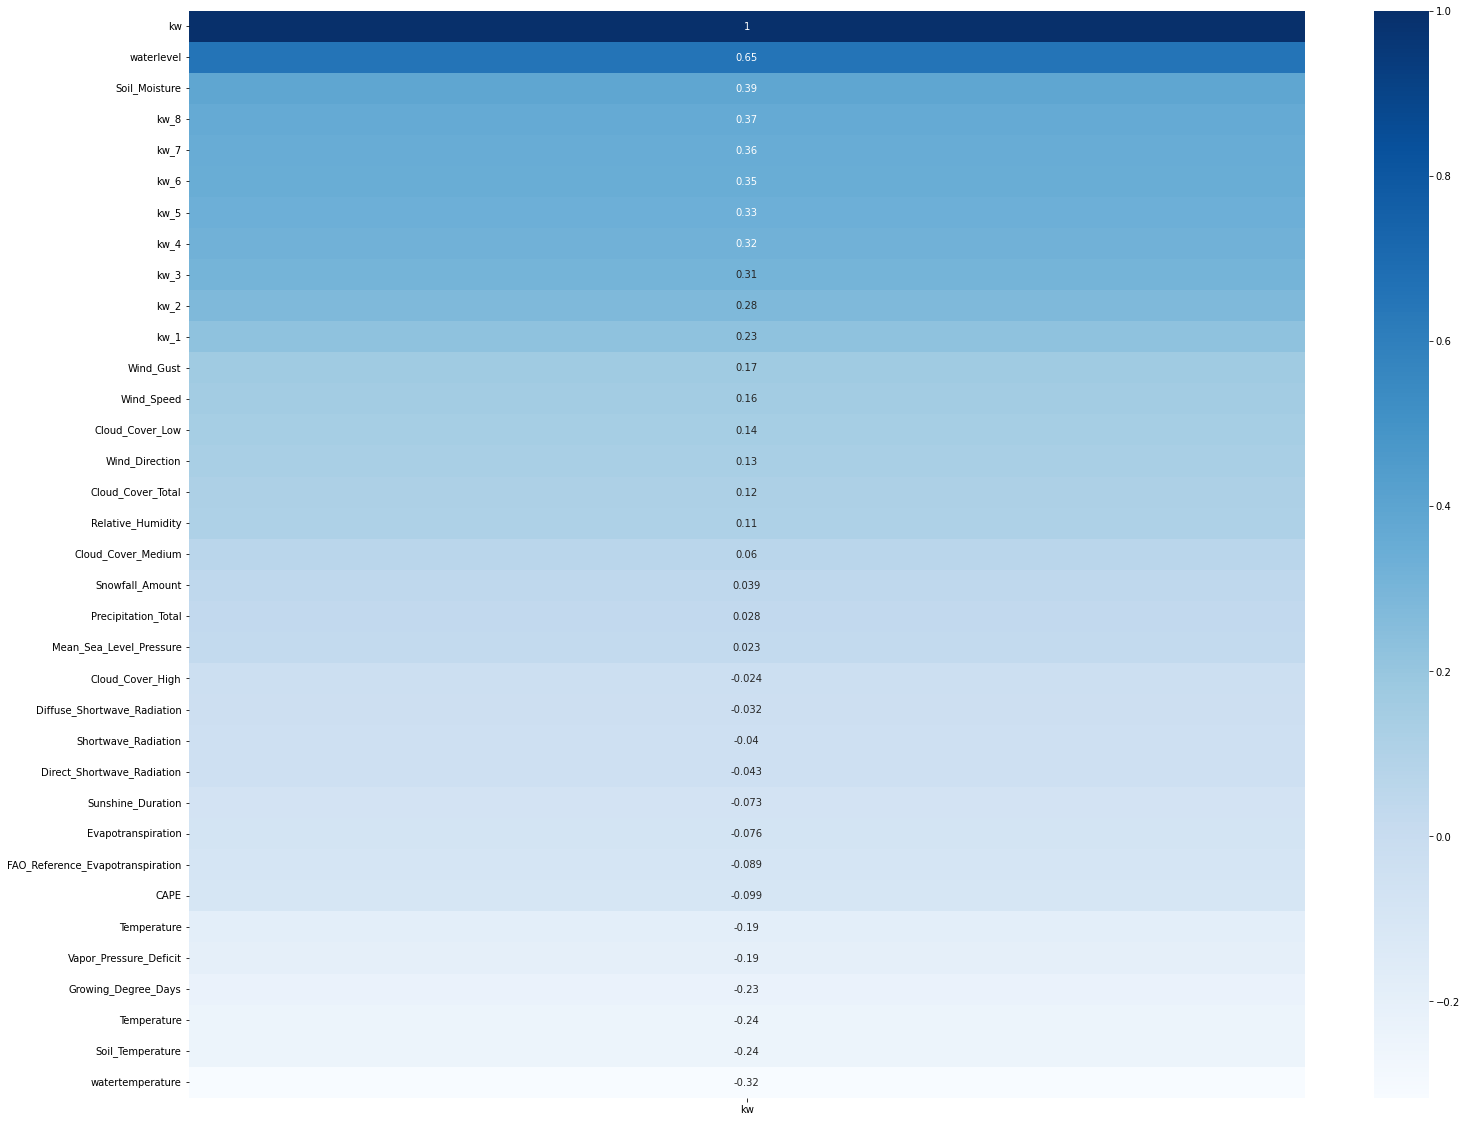

In [13]:
cor_matrix = pp.corr()
cor_matrix[['kw']]

f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(cor_matrix[['kw']].sort_values(by=['kw'], ascending =False), annot=True, cmap="Blues")
plt.show()

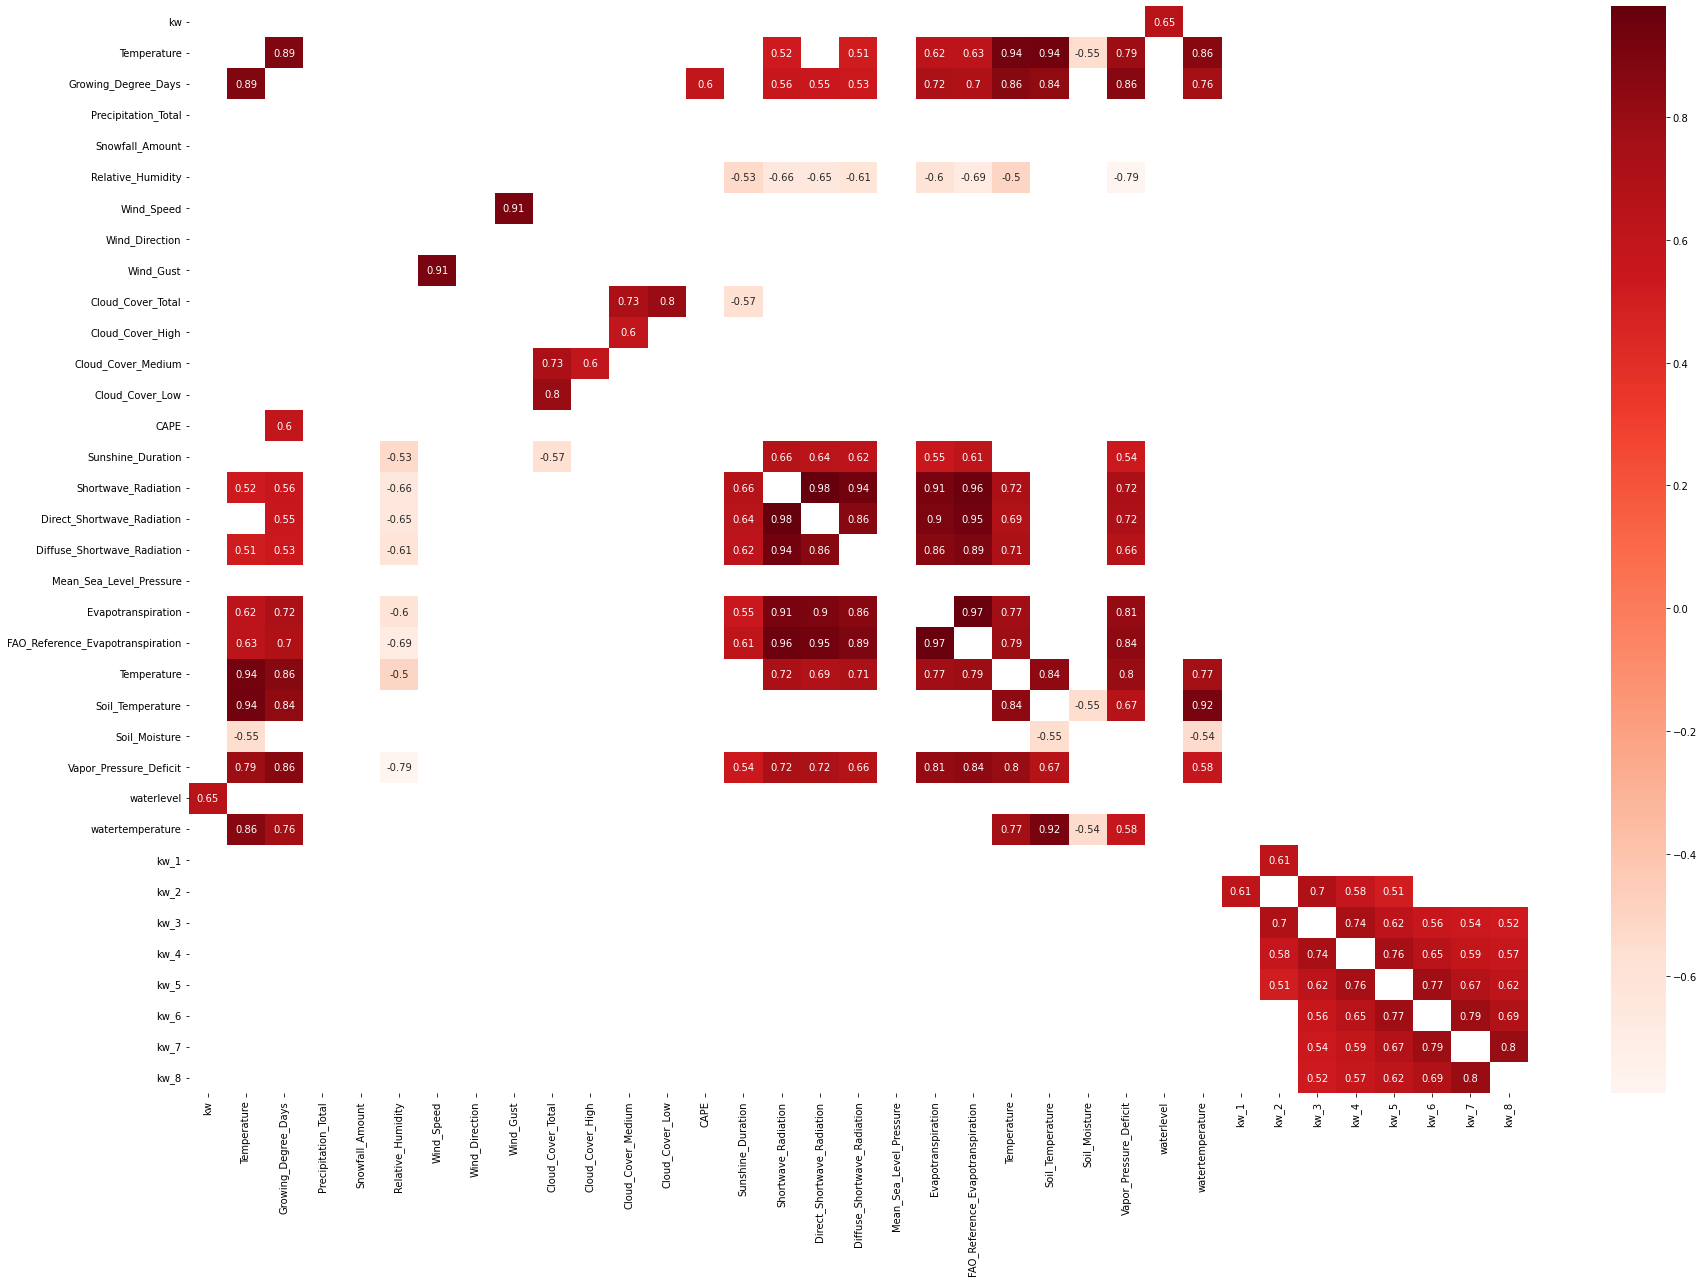

In [14]:
filteredDf = cor_matrix[((cor_matrix >= .5) | (cor_matrix <= -.5)) & (cor_matrix !=1.000)]
plt.figure(figsize=(30,20))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
#plt.savefig('matrix.jpeg')
plt.show()


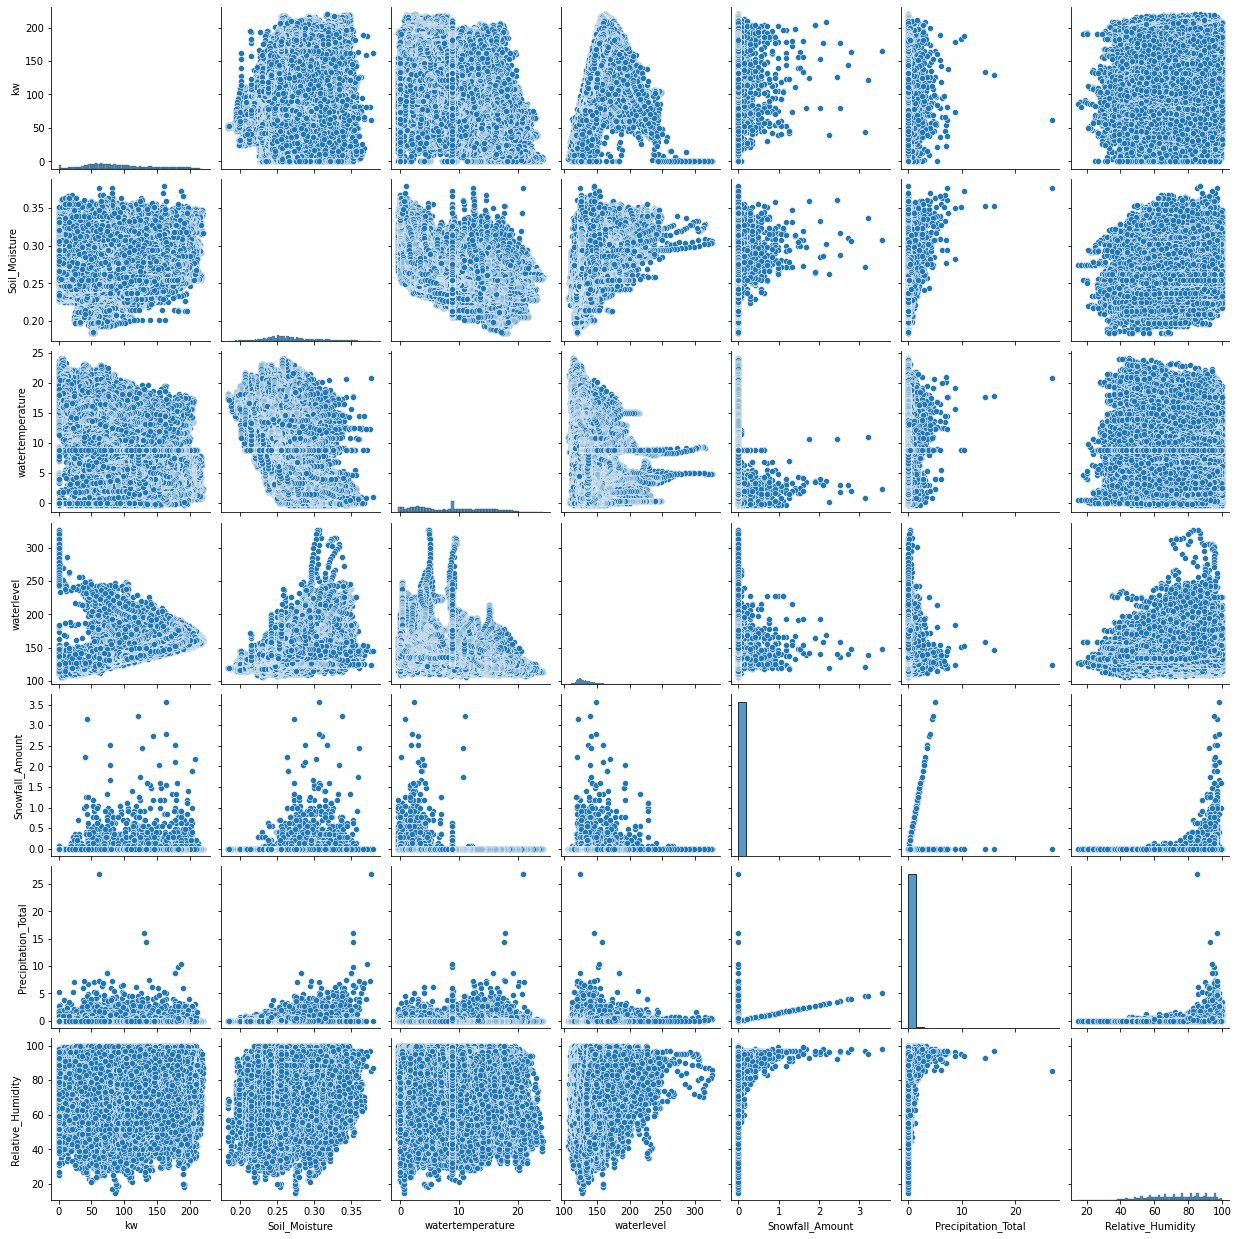

In [15]:
sns.pairplot(pp[['kw', "Soil_Moisture", "watertemperature","waterlevel",
                 "Snowfall_Amount", "Precipitation_Total", "Relative_Humidity"]])
plt.show()

The heatmap shows that past lag values of kw certain affect present kw values.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


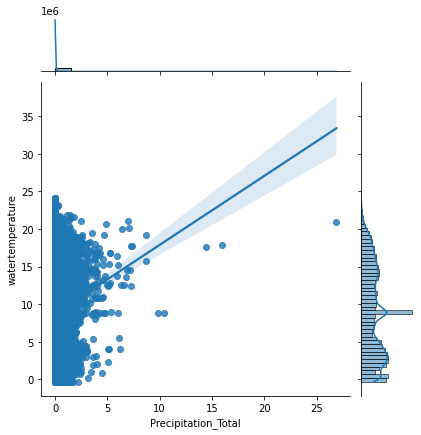

In [16]:
sns.jointplot("Precipitation_Total", "watertemperature", data=pp, kind='reg');

In [17]:
fit1 = np.polyfit(pp["Soil_Moisture"], pp["Precipitation_Total"], 1)  # linear
fit2 = np.polyfit(pp["Soil_Moisture"], pp["Precipitation_Total"], 2)  # quadratic
fit3 = np.polyfit(pp["Soil_Moisture"], pp["Precipitation_Total"], 3)  # cubic

v1 = np.polyval(fit1, pp["Soil_Moisture"])
v2 = np.polyval(fit2, pp["Soil_Moisture"])
v3 = np.polyval(fit3, pp["Soil_Moisture"])

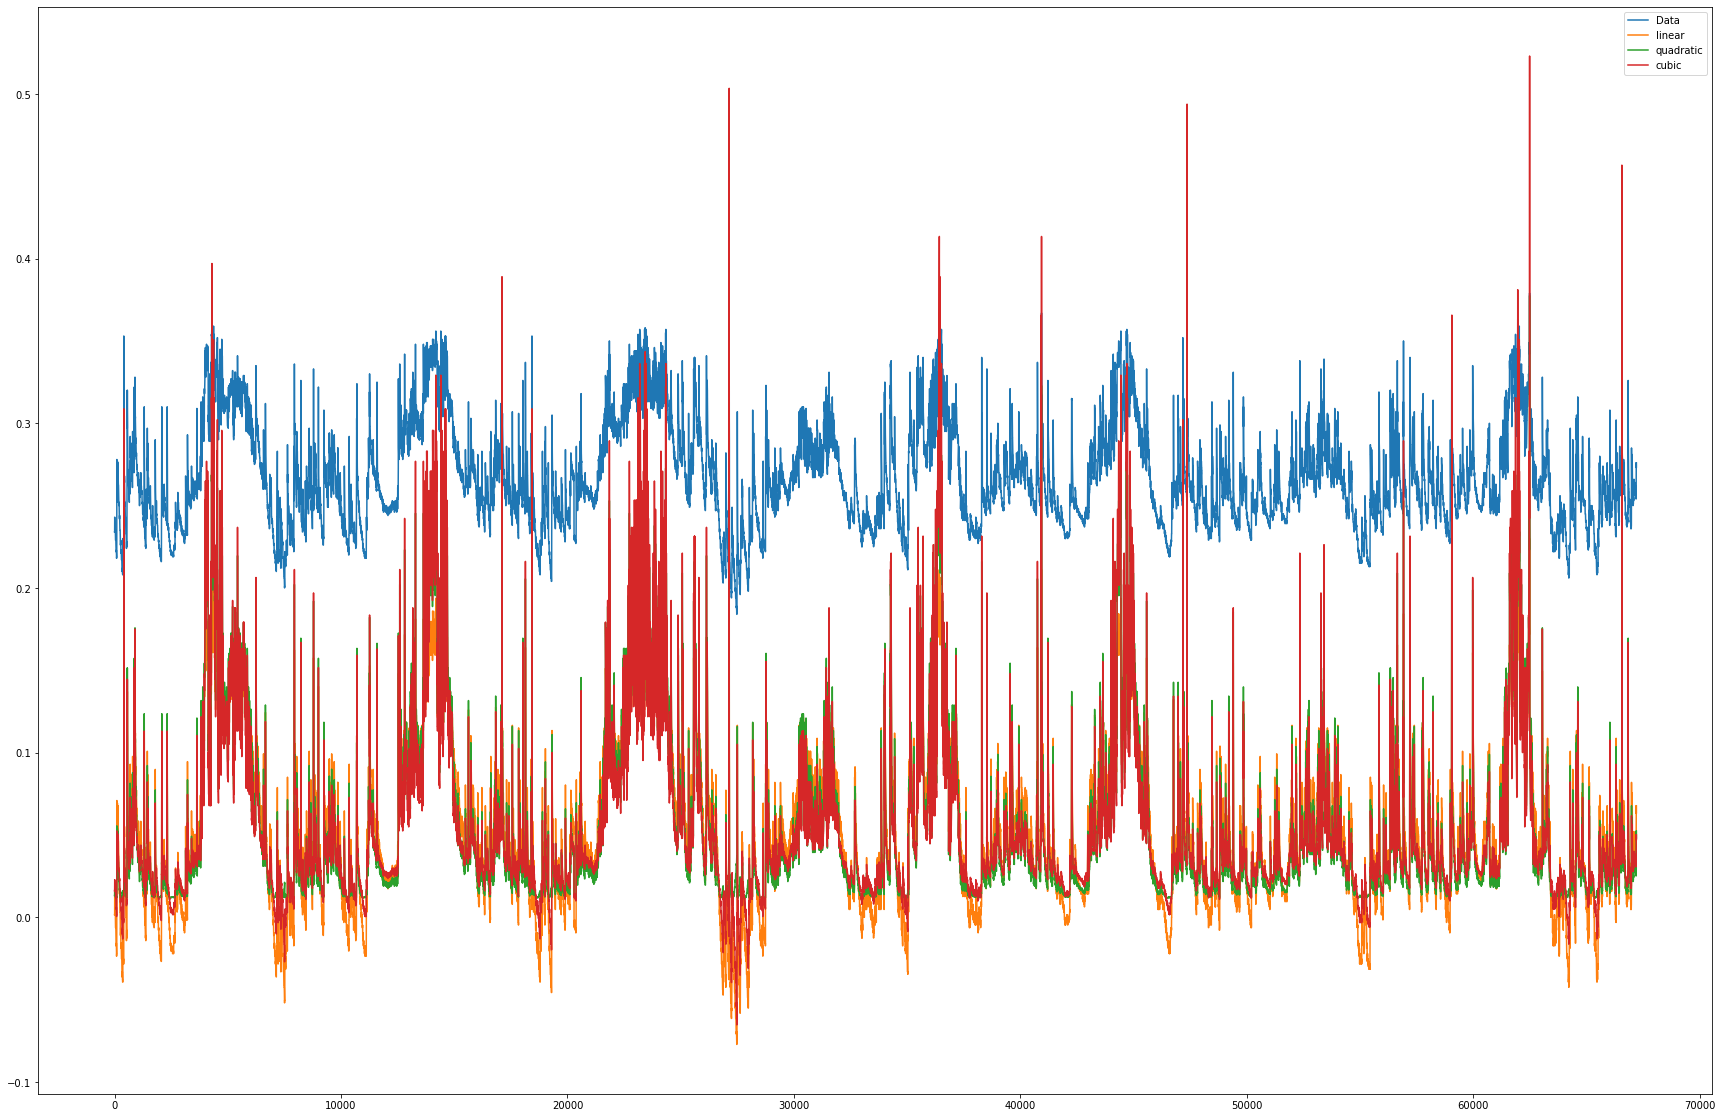

In [18]:
plt.figure(figsize=(30,20))
plt.plot(pp["Soil_Moisture"].values, label="Data")
plt.plot(v1, label = "linear")
plt.plot(v2, label = "quadratic")
plt.plot(v3, label = "cubic")
plt.legend()
plt.show()

In [19]:
def data_split(data, test_size):
    split = len(data)-test_size
    train = data[:split]
    test = data[split:]
    
    return (train, test)


In [20]:
# Split_sequence Function: Arguments
# This function will prepare time series data to be used in LSTM model.
# The function takes defined number of time steps and then calculates all samples of same length.

# Arguments:

# sequence: This is the dataset length, which will be used to calculate batches.
# n_steps_in : provide time steps to be used to predict future time steps
# n_steps_out: How many hours/days you want to predict in future. Right now it's 72 hours.

def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [21]:
# The below function provides general lstm model structure.
# This function will take two argument values:

# 1. n-neurons: Right now we are using 50 neurons, but it can increased or decreased 
# to check if it affects model results.

# 2. lr = Learning rate: The learning rate is an important parameter, it seems that
# smaller values decrease model overfitting

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


def build_lstm_model(n_neurons, lr, n_steps_in, n_features, n_steps_out):
    opt = keras.optimizers.Adam(learning_rate=lr)
    
    model = Sequential()
    
    model.add(LSTM(n_neurons, return_sequences=True, activation='tanh',
                   input_shape=(n_steps_in, n_features)))
    model.add(Dropout(0.3))
    
    model.add(LSTM(units=n_neurons, activation='tanh'))
    model.add(Dropout(0.3))
    
    model.add(Dense(n_steps_out, activation='linear'))
    model.compile(optimizer=opt, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    model.summary()
    
    return model



%history -g -f history.py

In [22]:
# Data Normalization: Has to be done for better predictions. All columns values range will be between 0 and 1.

def prepare_time_series(X, y, input_steps=7, output_steps=7, past=3):
    
    scaler1 = MinMaxScaler(feature_range=(0, 1))
    x_scaled = scaler1.fit_transform(X)
    y_scaled = scaler1.fit_transform(y.reshape((len(y), 1)))
    
    dataset_stacked = hstack((x_scaled, y_scaled))
    print ("dataset_stacked.shape" , dataset_stacked.shape)
    
    # choose a number of time steps # change this accordingly

    n_steps_in, n_steps_out = input_steps*past, output_steps 

    # covert into input/output
    x, Y = split_sequences(dataset_stacked, n_steps_in, n_steps_out)

    print ("X.shape" , X.shape) 
    print ("y.shape" , y.shape) 
    
    return(x, Y)

In [23]:
def train_test_split(X, y, split_size=0.9):
    
    split_point = int(len(X)*split_size)
    train_X , train_y = X[:split_point, :] , y[:split_point, :]
    test_X , test_y = X[split_point:, :] , y[split_point:, :]

    n_features = train_X.shape[2]
    
    print ("train_X.shape" , train_X.shape) 
    print ("train_y.shape" , train_y.shape)  
    print ("test_X.shape" , test_X.shape) 
    print ("test_y.shape" , test_y.shape) 
    print ("n_features" , n_features)
    
    return(train_X, train_y, test_X, test_y)

### LSTM Model for daily data

As now dataset has become much smaller, we can try large number of parameters on this model.

## Grid Sarch Method to find Optimal parameters

The below code will apply random cross validation method to find optimal parameters:
1. n-neurons: Right now we are using 50 neurons, but it can increased or decreased 
to check if it affects model results.

2. lr = Learning rate: The learning rate is an important parameter, it seems that smaller values decrease
model overfitting

3. batch_size: One batch contains 720 time steps, so it size should be a small number. Between 10-20 at maximum

4. epoch size: I have go with 100 epoch size, but we can add other number of epochs to look for better model

All these parameters are combined in dict to fed to RandomizedSearchCV method.

In the last steps the models we build with random search cv, are fitted to the data.

### Fit Different parameters and find best model.

In [24]:
# define the grid search parameters
learning_rate = [0.01, 0.001]
neurons = [50]
batch_size = [112, 128]
epoch = [200]
params_distrib = dict(batch_size=batch_size, n_neurons=neurons, lr=learning_rate,
                     epochs=epoch)
    
def cross_validation(train_x, train_y, valid_x, valid_y, params_distrib=params_distrib):
    n_steps_in, n_features, n_steps_out = train_x.shape[1], train_x.shape[2], valid_y.shape[1]
    keras_reg1 = KerasRegressor(build_lstm_model, n_steps_in = n_steps_in, n_features=n_features,
                                       n_steps_out=n_steps_out)

    rnd_search_cv = RandomizedSearchCV(keras_reg1, params_distrib, cv=3,n_iter=2,
                                       scoring="r2")
    grid_result = rnd_search_cv.fit(train_x, train_y, epochs=50, 
                    validation_data=(valid_x, valid_y))
    
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("Mean: %f (Standard Deviation: %f) with: %r" % (mean, stdev, param))
    
    # Accuracy and loss
    fig = plt.figure(figsize=(20,7))
    fig.add_subplot(121)
    plt.plot(grid_result.best_estimator_.model.history.history['root_mean_squared_error'])
    plt.plot(grid_result.best_estimator_.model.history.history['val_root_mean_squared_error'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')

    #Adding Subplot 1 (For Loss)
    fig.add_subplot(122)

    plt.plot(grid_result.best_estimator_.model.history.history['loss'], label="loss")
    plt.plot(grid_result.best_estimator_.model.history.history['val_loss'], label="val_loss")

    plt.title("Loss", fontsize=18)
    plt.xlabel("Epochs", fontsize=15)
    plt.ylabel("Loss", fontsize=15)
    plt.grid(alpha=0.3)
    plt.legend()

    plt.show()
    return grid_result

In [25]:
## Daily Data
#daily_mean = pp.resample("D").mean()
daily_sum = pp.resample("D").sum()
# Replace Null-Values with forward fill and then backward fill
daily_sum = daily_sum.fillna(method="pad")
daily_sum = daily_sum.fillna(method="bfill")
# Methode:
#  pad = forwardfill method

daily_mean = pp.resample("D").mean()
# Replace Null-Values with forward fill and then backward fill
daily_mean = daily_mean.fillna(method="pad")
daily_mean = daily_mean.fillna(method="bfill")


daily_mean["kw"] = daily_sum["kw"]

In [26]:
daily_mean

kw  Temperature  Growing_Degree_Days  Precipitation_Total  \
timestamp                                                                     
2010-07-01  3046.503    22.537221             0.522384             0.000000   
2010-07-02  2625.945    23.365137             0.556881             0.000000   
2010-07-03  2481.057    24.294721             0.595613             0.000000   
2010-07-04  2472.849    22.242221             0.510093             0.000000   
2010-07-05  3162.573    19.250971             0.385457             0.270833   
...              ...          ...                  ...                  ...   
2021-08-27  4379.067    12.020138             0.085823             0.062500   
2021-08-28  4377.252    11.833054             0.080910             0.062500   
2021-08-29  4318.542    11.551388             0.082944             0.016667   
2021-08-30  4045.755    12.147221             0.102892             0.004167   
2021-08-31  4220.622    12.676804             0.117405             0.150000   

            Snowfall_Amount  Relative_Humidity  Wind_Speed  Wind_Direction  \
timestamp                                                                    
2010-07-01              0.0          60.333333    3.387574      156.228139   
2010-07-02              0.0          56.833333    4.915019      105.717711   
2010-07-03              0.0          56.750000    8.644623       57.885583   
2010-07-04              0.0          69.250000   10.595661      209.161141   
2010-07-05              0.0          86.083333   11.821382      280.565193   
...                     ...                ...         ...             ...   
2021-08-27              0.0          82.375000   14.978741      268.321127   
2021-08-28              0.0          84.250000   10.571710      255.611063   
2021-08-29              0.0          82.625000    7.114682      273.322180   
2021-08-30              0.0          86.166667    7.751666      261.740811   
2021-08-31              0.0          88.166667   12.321873      297.154560   

            Wind_Gust  Cloud_Cover_Total  ...  waterlevel  watertemperature  \
timestamp                                 ...                                 
2010-07-01   3.915000          16.133333  ...  138.239583         15.481250   
2010-07-02   5.595000          39.391667  ...  135.305208         16.188542   
2010-07-03   9.165000          11.779167  ...  133.741667         17.088542   
2010-07-04  14.475000          33.266667  ...  134.892708         17.167708   
2010-07-05  16.995000          65.104167  ...  146.179167         16.436458   
...               ...                ...  ...         ...               ...   
2021-08-27  19.980000          90.791667  ...  178.397917          8.850000   
2021-08-28  14.504999          91.916667  ...  177.117708          8.850000   
2021-08-29  10.365000          63.875000  ...  175.802083          8.850000   
2021-08-30  10.530000          81.458333  ...  168.981250          8.850000   
2021-08-31  18.375000          67.416667  ...  186.444792          8.850000   

                 kw_1       kw_2       kw_3       kw_4       kw_5       kw_6  \
timestamp                                                                      
2010-07-01 -34.677000 -45.156000 -45.897000 -10.509000 -11.541000   4.812000   
2010-07-02 -17.523250 -45.156000 -45.897000 -10.509000 -11.541000   4.812000   
2010-07-03  -6.037000 -23.560250 -45.897000 -10.509000 -11.541000   4.812000   
2010-07-04  -0.342000  -6.379000 -23.902250 -10.509000 -11.541000   4.812000   
2010-07-05  28.738500  28.396500  22.359500   4.836250 -11.541000   4.812000   
...               ...        ...        ...        ...        ...        ...   
2021-08-27  54.371750  41.628750  27.161000  27.363875  72.502375  73.762250   
2021-08-28  -0.075625  54.296125  41.553125  27.085375  27.288250  72.426750   
2021-08-29  -2.446250  -2.521875  51.849875  39.106875  24.639125  24.842000   
2021-08-30 -11.366125 -13.812375 -13.888000  40.483750  27.740750  

In [27]:
# Data Preparation:
# X needs to be 25 stamps ahead, and kw needs to be same

# new dataset without Test values
data, Test = data_split(daily_mean, (30+21))

# Now shift values by * days, however as only need x features shifted, we will drop kw from this data and then add
# it again from original data with first time stamp

df = data.shift(-8)
df = df.fillna(method="pad")
df["kw"] = data["kw"]
df["kw_8"] = data["kw_8"]

test_df = Test.shift(-8)
test_df=test_df.fillna(method="pad")
test_df["kw"] = Test["kw"]
test_df["kw_8"] = Test["kw_8"]

In [28]:
import plotly.express as px
fig = px.line(daily_sum, x=daily_sum.index, y='kw', title='Production')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='3y', step='year', stepmode='backward'),
            dict(count=3, label='5y', step='year', stepmode='backward'),
            dict(step='all')
            ])
    )
)
fig.show()

## Model 1: All Features with shifting features values to 8 days in future

In [29]:
x1 = df.values
y = data["kw"].values


X, Y = prepare_time_series(x1, y)

X_train, y_train, x_test, y_test = train_test_split(X, Y)

dataset_stacked.shape (4029, 36)
X.shape (4029, 35)
y.shape (4029,)
train_X.shape (3602, 21, 35)
train_y.shape (3602, 7)
test_X.shape (401, 21, 35)
test_y.shape (401, 7)
n_features 35


2021-12-12 21:21:48.104715: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-12 21:21:48.116082: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-12 21:21:48.117031: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-12 21:21:48.119620: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-12 21:21:48.120567: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read f

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 21, 50)            17200     
_________________________________________________________________
dropout (Dropout)            (None, 21, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 7)                 357       
Total params: 37,757
Trainable params: 37,757
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


2021-12-12 21:21:49.658489: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-12 21:21:52.717424: I tensorflow/stream_executor/cuda/cuda_dnn.cc:381] Loaded cuDNN version 8204


22/22 [==============================] - 5s 33ms/step - loss: 0.0509 - root_mean_squared_error: 0.2256 - val_loss: 0.0479 - val_root_mean_squared_error: 0.2188
Epoch 2/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0123 - root_mean_squared_error: 0.1107 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1374
Epoch 3/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0083 - root_mean_squared_error: 0.0912 - val_loss: 0.0169 - val_root_mean_squared_error: 0.1301
Epoch 4/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0072 - root_mean_squared_error: 0.0851 - val_loss: 0.0138 - val_root_mean_squared_error: 0.1175
Epoch 5/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0059 - root_mean_squared_error: 0.0769 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1038
Epoch 6/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0050 - root_mean_squared_error: 0.0710 - val_loss: 0.0088 - val_root_mean_squared_erro

22/22 [==============================] - 0s 7ms/step - loss: 0.0019 - root_mean_squared_error: 0.0439 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0541
Epoch 50/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0023 - root_mean_squared_error: 0.0477 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0715
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 21, 50)            17200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 21, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
______________________________________________________

22/22 [==============================] - 0s 7ms/step - loss: 0.0029 - root_mean_squared_error: 0.0537 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0499
Epoch 42/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0029 - root_mean_squared_error: 0.0538 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0442
Epoch 43/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0030 - root_mean_squared_error: 0.0548 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0440
Epoch 44/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0031 - root_mean_squared_error: 0.0557 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0459
Epoch 45/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0028 - root_mean_squared_error: 0.0532 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0457
Epoch 46/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0029 - root_mean_squared_error: 0.0535 - val_loss: 0.0018 - val_root_mean_squared_

22/22 [==============================] - 0s 7ms/step - loss: 0.0031 - root_mean_squared_error: 0.0554 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0708
Epoch 34/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0035 - root_mean_squared_error: 0.0589 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0706
Epoch 35/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0030 - root_mean_squared_error: 0.0551 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0569
Epoch 36/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0029 - root_mean_squared_error: 0.0543 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0579
Epoch 37/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0027 - root_mean_squared_error: 0.0519 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0611
Epoch 38/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0033 - root_mean_squared_error: 0.0573 - val_loss: 0.0043 - val_root_mean_squared_

22/22 [==============================] - 0s 7ms/step - loss: 0.0036 - root_mean_squared_error: 0.0596 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0838
Epoch 26/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0035 - root_mean_squared_error: 0.0592 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0818
Epoch 27/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0034 - root_mean_squared_error: 0.0586 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0871
Epoch 28/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0034 - root_mean_squared_error: 0.0582 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0982
Epoch 29/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0033 - root_mean_squared_error: 0.0573 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0866
Epoch 30/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0031 - root_mean_squared_error: 0.0558 - val_loss: 0.0065 - val_root_mean_squared_

22/22 [==============================] - 0s 7ms/step - loss: 0.0099 - root_mean_squared_error: 0.0993 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0823
Epoch 18/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0090 - root_mean_squared_error: 0.0946 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0814
Epoch 19/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0085 - root_mean_squared_error: 0.0924 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0792
Epoch 20/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0088 - root_mean_squared_error: 0.0939 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0781
Epoch 21/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0083 - root_mean_squared_error: 0.0914 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0777
Epoch 22/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0080 - root_mean_squared_error: 0.0896 - val_loss: 0.0060 - val_root_mean_squared_

22/22 [==============================] - 0s 7ms/step - loss: 0.0089 - root_mean_squared_error: 0.0945 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0987
Epoch 10/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0086 - root_mean_squared_error: 0.0928 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1075
Epoch 11/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0087 - root_mean_squared_error: 0.0931 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0972
Epoch 12/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0076 - root_mean_squared_error: 0.0872 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0952
Epoch 13/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0078 - root_mean_squared_error: 0.0885 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0970
Epoch 14/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0079 - root_mean_squared_error: 0.0887 - val_loss: 0.0097 - val_root_mean_squared_

33/33 [==============================] - 3s 22ms/step - loss: 0.0447 - root_mean_squared_error: 0.2113 - val_loss: 0.0211 - val_root_mean_squared_error: 0.1454
Epoch 2/50
33/33 [==============================] - 0s 6ms/step - loss: 0.0186 - root_mean_squared_error: 0.1364 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1084
Epoch 3/50
33/33 [==============================] - 0s 6ms/step - loss: 0.0139 - root_mean_squared_error: 0.1179 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1099
Epoch 4/50
33/33 [==============================] - 0s 6ms/step - loss: 0.0126 - root_mean_squared_error: 0.1124 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1037
Epoch 5/50
33/33 [==============================] - 0s 6ms/step - loss: 0.0104 - root_mean_squared_error: 0.1022 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1093
Epoch 6/50
33/33 [==============================] - 0s 7ms/step - loss: 0.0097 - root_mean_squared_error: 0.0983 - val_loss: 0.0076 - val_root_mean_squared_erro

33/33 [==============================] - 0s 6ms/step - loss: 0.0032 - root_mean_squared_error: 0.0570 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0640
Epoch 50/50
33/33 [==============================] - 0s 6ms/step - loss: 0.0031 - root_mean_squared_error: 0.0561 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0633
Best: 0.930288 using {'n_neurons': 50, 'lr': 0.001, 'epochs': 200, 'batch_size': 112}
Mean: 0.917351 (Standard Deviation: 0.035132) with: {'n_neurons': 50, 'lr': 0.01, 'epochs': 200, 'batch_size': 112}
Mean: 0.930288 (Standard Deviation: 0.037946) with: {'n_neurons': 50, 'lr': 0.001, 'epochs': 200, 'batch_size': 112}


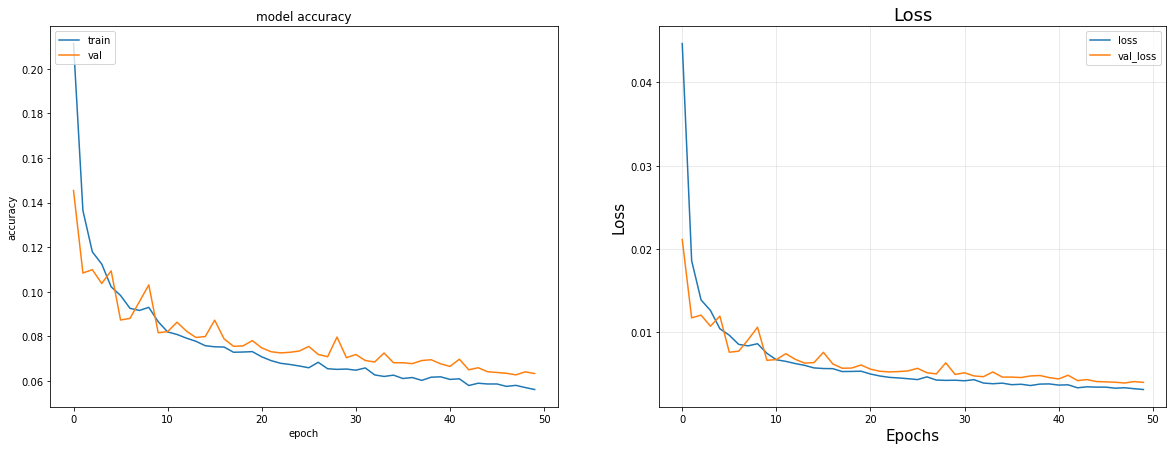

In [30]:
results1 = cross_validation(X_train, y_train, x_test, y_test)

In [31]:
# TEST DATA Fucntions

def prep_data(x, y_test , start , end , last, model, n_steps_out=7):
    #prepare test data X
    dataset_test_X = x[start:end, :]
    test_X_new = dataset_test_X.reshape(1,dataset_test_X.shape[0],dataset_test_X.shape[1])
    past_data = y_test[:end]
    dataset_test_y = y_test[end:last]
    scaler1 = MinMaxScaler(feature_range=(0, 1))
    scaler1.fit(dataset_test_y.values.reshape(-1, 1))
    y_pred = model.predict(test_X_new).reshape(-1, 1)
    y_pred_inv = scaler1.inverse_transform(y_pred)
    y_pred_inv = y_pred_inv.reshape(n_steps_out,1)
    y_pred_inv = y_pred_inv[:,0]
    
    return y_pred_inv , dataset_test_y , past_data


def evaluate_prediction(predictions, actual, model_name , start , end):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    r2 = 1-(sum(errors**2)/sum((actual-np.mean(actual))**2))
    print("Test Data from {} to {}".format(str(start), str(end)))
    print('Mean Square Error: {:.2f}'.format(mse))
    print('Mean Absolute Error: {:.2f}'.format(mae))
    print('Root Mean Square Error: {:.2f}'.format(rmse))
    print('R-Square: {:.2f}'.format(r2_score(actual,predictions)))
    print('')
    print('')
    d = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R^2": r2}
    data = pd.DataFrame(d, index=[str(start)+" : "+str(end)])
    
    return(data)

In [32]:
# Plot history and future
def plot_multistep(history, prediction1 , groundtruth , start , end):
    plt.figure(figsize=(20, 4))
    
    y_mean = mean(prediction1)
    
    plt.plot(history.index, np.array(history), label='History')
    plt.plot(groundtruth.index, np.array(prediction1),label='Forecasted with LSTM')
    plt.plot(groundtruth.index, np.array(groundtruth),label='GroundTruth')
    
    plt.legend(loc='upper right')
    plt.title("Test Data from {} to {} , Mean = {:.2f}".format(history.index[0],
                               groundtruth.index[-1], y_mean) ,  fontsize=18)
    plt.xlabel('Time stamp' ,  fontsize=18)
    plt.ylabel('y-value' , fontsize=18)


In [33]:

x_test = test_df.values
y_test = test_df['kw']


scaler = MinMaxScaler(feature_range=(0, 1))

test_scaled = scaler.fit_transform(x_test)


start = 0
end = start + 14
last = end + 7
y_pred_inv , dataset_test_y , past_data = prep_data(test_scaled, y_test , start , end , last, results1)

Test Data from 2021-08-02 00:00:00 to 2021-08-08 00:00:00
Mean Square Error: 100835.05
Mean Absolute Error: 249.69
Root Mean Square Error: 317.55
R-Square: 0.26


Test Data from 2021-08-09 00:00:00 to 2021-08-15 00:00:00
Mean Square Error: 104017.70
Mean Absolute Error: 313.87
Root Mean Square Error: 322.52
R-Square: 0.26


Test Data from 2021-08-16 00:00:00 to 2021-08-22 00:00:00
Mean Square Error: 77227.66
Mean Absolute Error: 239.69
Root Mean Square Error: 277.90
R-Square: -0.05


Test Data from 2021-08-23 00:00:00 to 2021-08-29 00:00:00
Mean Square Error: 152912.57
Mean Absolute Error: 348.01
Root Mean Square Error: 391.04
R-Square: 0.34




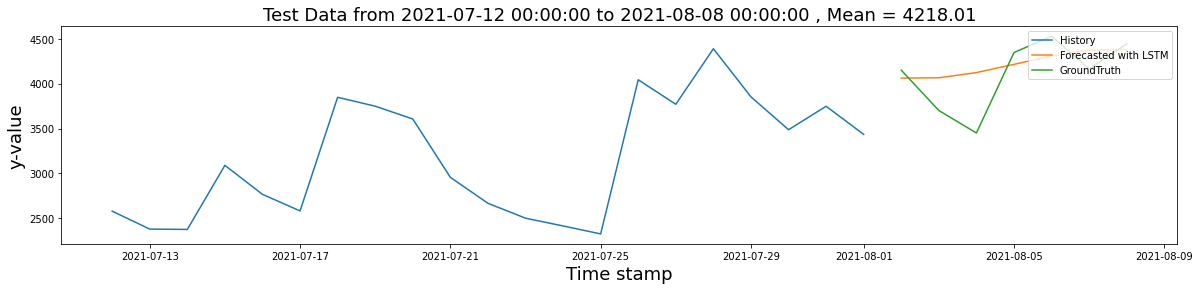

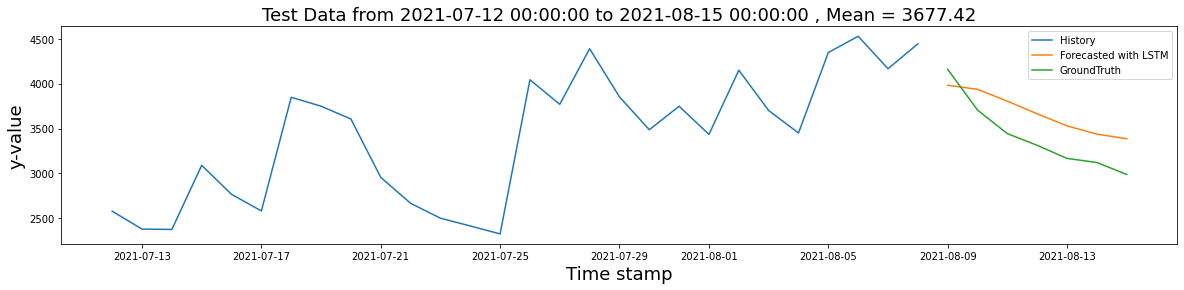

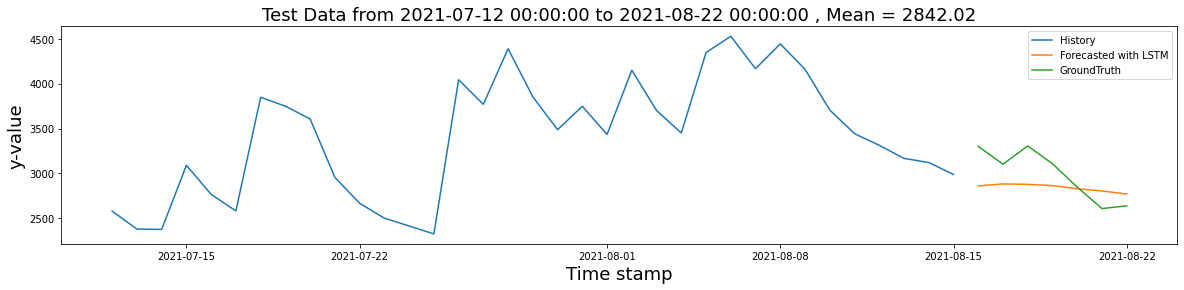

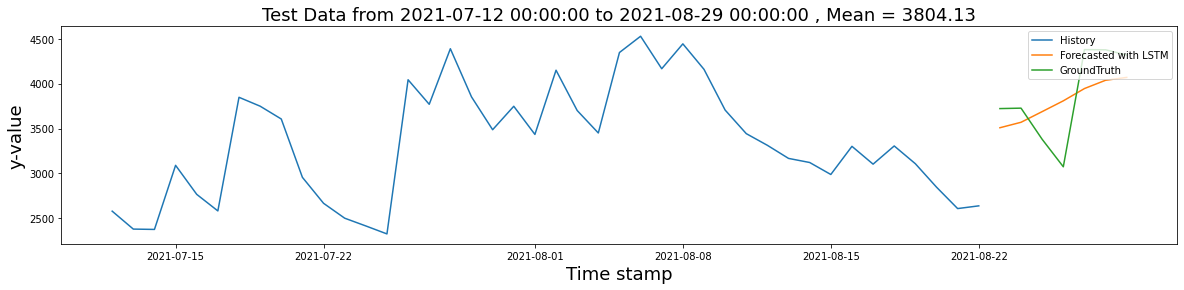

In [34]:
# all test batches

dfs1 = pd.DataFrame() # to save predictions
past = pd.DataFrame() # to save past data which is not used to evaluate metrics
error_metrics_1 = pd.DataFrame() # To save error metrics

for i in range(0,28,7):
    
    n_steps_in = 21
    n_steps_out = 7
    start = i
    end = start + n_steps_in 
    last = end + n_steps_out 
    
    # prepare data for time series sequence
    y_pred_inv , dataset_test_y , past_data = prep_data(test_scaled, y_test, start,
                                                        end, last, results1)
    # plot the sequence
    plot_multistep(past_data , y_pred_inv , dataset_test_y , start , end)
    
    # calculate errors and then return dataframe
    errors = evaluate_prediction(y_pred_inv , dataset_test_y, 'LSTM' , dataset_test_y.index[0],
                                 dataset_test_y.index[-1])
    
    
    # concat with previour error data frames
    error_metrics_1 = pd.concat([error_metrics_1, errors], ignore_index=False)
    
    # save past data
    past = pd.DataFrame()
    past["past"] = past_data
    
    # concat with previour past data frames
    past = pd.concat([past], ignore_index=False)
    
    # create data to save multiple colums
    d = pd.DataFrame()
    d["Ground Truth"] = dataset_test_y
    d["Predictions"] = y_pred_inv
    
    # concat with outside dataframe to save all results
    dfs1 = pd.concat([dfs1, d], ignore_index=False)

# Now merge past and predictions dataframe on date column
all_data1 = past.merge(dfs1, right_index=True, left_index=True, how="outer") 

In [35]:
all_data1.to_csv(os.path.join(forecast, "mm_lstm_d_3.csv"))

In [36]:
error_metrics_1

MSE        RMSE  \
2021-08-02 00:00:00 : 2021-08-08 00:00:00  100835.052295  317.545355   
2021-08-09 00:00:00 : 2021-08-15 00:00:00  104017.699934  322.517751   
2021-08-16 00:00:00 : 2021-08-22 00:00:00   77227.660793  277.898652   
2021-08-23 00:00:00 : 2021-08-29 00:00:00  152912.574067  391.040374   

                                                  MAE       R^2  
2021-08-02 00:00:00 : 2021-08-08 00:00:00  249.687356  0.256002  
2021-08-09 00:00:00 : 2021-08-15 00:00:00  313.874090  0.256397  
2021-08-16 00:00:00 : 2021-08-22 00:00:00  239.690232 -0.054055  
2021-08-23 00:00:00 : 2021-08-29 00:00:00  348.011736  0.343953

In [37]:
fig1 = px.line(all_data1, x=all_data1.index, y=["past", "Ground Truth", "Predictions"])

fig1.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label='1 Week', step='day', stepmode='backward'),
            dict(count=14, label='2 Weeks', step='day', stepmode='backward'),
            dict(count=21, label='3 Weeks', step='day', stepmode='backward'),
            dict(step='all')
            ])
    )
)

# Show plot 
fig1.show()

## Model 2: Selected Features with shifting features values to future

In [38]:
x1 = df[['kw', 'Temperature', 'Soil_Temperature', 'Sunshine_Duration',
                 'Precipitation_Total', 'waterlevel', 'watertemperature', 'kw_8']].copy()


y = df["kw"].values
X, Y = prepare_time_series(x1.values, y)


X_train, y_train, x_test, y_test = train_test_split(X, Y)

dataset_stacked.shape (4029, 10)
X.shape (4029, 9)
y.shape (4029,)
train_X.shape (3602, 21, 9)
train_y.shape (3602, 7)
test_X.shape (401, 21, 9)
test_y.shape (401, 7)
n_features 9


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 21, 50)            12000     
_________________________________________________________________
dropout_14 (Dropout)         (None, 21, 50)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_15 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 357       
Total params: 32,557
Trainable params: 32,557
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
22/22 [==============================] - 3s 31ms/step - loss: 0.0360 - root_mean_squared_error: 0.1899 - 

22/22 [==============================] - 0s 7ms/step - loss: 0.0044 - root_mean_squared_error: 0.0663 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1047
Epoch 44/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0043 - root_mean_squared_error: 0.0652 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0993
Epoch 45/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0043 - root_mean_squared_error: 0.0654 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1048
Epoch 46/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0041 - root_mean_squared_error: 0.0641 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0979
Epoch 47/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0041 - root_mean_squared_error: 0.0641 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0989
Epoch 48/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0041 - root_mean_squared_error: 0.0644 - val_loss: 0.0099 - val_root_mean_squared_

22/22 [==============================] - 0s 7ms/step - loss: 0.0105 - root_mean_squared_error: 0.1024 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0954
Epoch 36/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0103 - root_mean_squared_error: 0.1016 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0961
Epoch 37/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0098 - root_mean_squared_error: 0.0991 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0960
Epoch 38/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0098 - root_mean_squared_error: 0.0992 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0955
Epoch 39/50
22/22 [==============================] - 0s 6ms/step - loss: 0.0098 - root_mean_squared_error: 0.0991 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0937
Epoch 40/50
22/22 [==============================] - 0s 6ms/step - loss: 0.0096 - root_mean_squared_error: 0.0981 - val_loss: 0.0088 - val_root_mean_squared_

22/22 [==============================] - 0s 7ms/step - loss: 0.0082 - root_mean_squared_error: 0.0905 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1152
Epoch 28/50
22/22 [==============================] - 0s 6ms/step - loss: 0.0083 - root_mean_squared_error: 0.0912 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1155
Epoch 29/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0085 - root_mean_squared_error: 0.0921 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1137
Epoch 30/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0077 - root_mean_squared_error: 0.0879 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1138
Epoch 31/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0081 - root_mean_squared_error: 0.0902 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1142
Epoch 32/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0077 - root_mean_squared_error: 0.0877 - val_loss: 0.0134 - val_root_mean_squared_

19/19 [==============================] - 0s 7ms/step - loss: 0.0042 - root_mean_squared_error: 0.0649 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0902
Epoch 20/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0039 - root_mean_squared_error: 0.0628 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0951
Epoch 21/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0037 - root_mean_squared_error: 0.0612 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0933
Epoch 22/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0036 - root_mean_squared_error: 0.0597 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0868
Epoch 23/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0034 - root_mean_squared_error: 0.0584 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0922
Epoch 24/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0035 - root_mean_squared_error: 0.0591 - val_loss: 0.0074 - val_root_mean_squared_

19/19 [==============================] - 0s 7ms/step - loss: 0.0089 - root_mean_squared_error: 0.0942 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0908
Epoch 12/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0085 - root_mean_squared_error: 0.0921 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0891
Epoch 13/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0075 - root_mean_squared_error: 0.0864 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0851
Epoch 14/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0072 - root_mean_squared_error: 0.0847 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0853
Epoch 15/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0071 - root_mean_squared_error: 0.0841 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0857
Epoch 16/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0070 - root_mean_squared_error: 0.0835 - val_loss: 0.0067 - val_root_mean_squared_

19/19 [==============================] - 0s 7ms/step - loss: 0.0123 - root_mean_squared_error: 0.1108 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1104
Epoch 4/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0109 - root_mean_squared_error: 0.1046 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1077
Epoch 5/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0107 - root_mean_squared_error: 0.1034 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1135
Epoch 6/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0101 - root_mean_squared_error: 0.1006 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1061
Epoch 7/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0098 - root_mean_squared_error: 0.0992 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1061
Epoch 8/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0087 - root_mean_squared_error: 0.0933 - val_loss: 0.0110 - val_root_mean_squared_error

29/29 [==============================] - 3s 25ms/step - loss: 0.0363 - root_mean_squared_error: 0.1904 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1143
Epoch 2/50
29/29 [==============================] - 0s 6ms/step - loss: 0.0121 - root_mean_squared_error: 0.1099 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1136
Epoch 3/50
29/29 [==============================] - 0s 6ms/step - loss: 0.0109 - root_mean_squared_error: 0.1043 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1073
Epoch 4/50
29/29 [==============================] - 0s 7ms/step - loss: 0.0096 - root_mean_squared_error: 0.0979 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1058
Epoch 5/50
29/29 [==============================] - 0s 8ms/step - loss: 0.0092 - root_mean_squared_error: 0.0960 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1059
Epoch 6/50
29/29 [==============================] - 0s 7ms/step - loss: 0.0086 - root_mean_squared_error: 0.0930 - val_loss: 0.0107 - val_root_mean_squared_erro

29/29 [==============================] - 0s 6ms/step - loss: 0.0031 - root_mean_squared_error: 0.0555 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0615
Epoch 50/50
29/29 [==============================] - 0s 7ms/step - loss: 0.0032 - root_mean_squared_error: 0.0563 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0710
Best: 0.905250 using {'n_neurons': 50, 'lr': 0.01, 'epochs': 200, 'batch_size': 128}
Mean: 0.849839 (Standard Deviation: 0.062273) with: {'n_neurons': 50, 'lr': 0.001, 'epochs': 200, 'batch_size': 112}
Mean: 0.905250 (Standard Deviation: 0.022414) with: {'n_neurons': 50, 'lr': 0.01, 'epochs': 200, 'batch_size': 128}


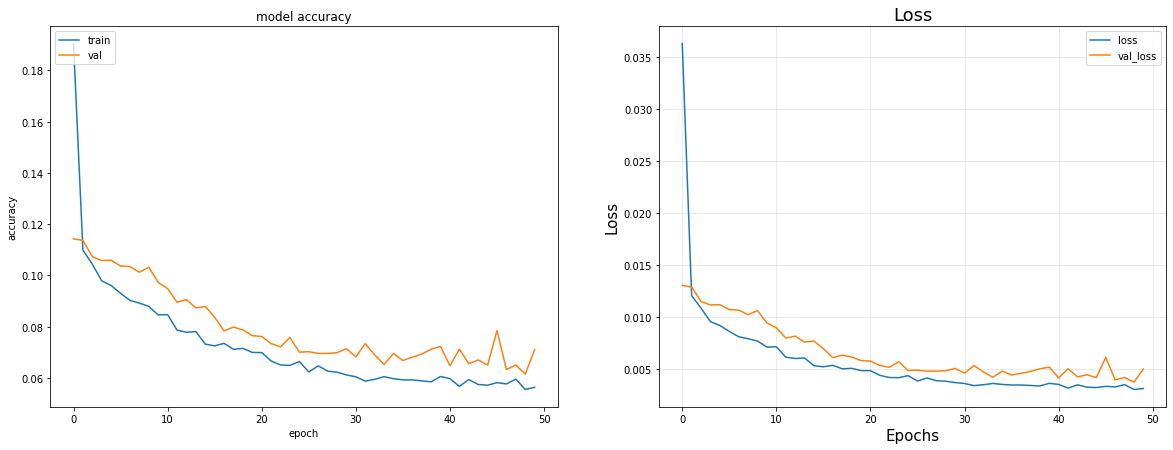

In [39]:
results2 = cross_validation(X_train, y_train, x_test, y_test)

In [40]:
# prepare test data

x_test = test_df[['kw', 'Temperature', 'Soil_Temperature', 'Sunshine_Duration',
                 'Precipitation_Total', 'waterlevel', 'watertemperature', 'kw_8']].copy()

y_test = test_df['kw']

scaler = MinMaxScaler(feature_range=(0, 1))

test_scaled = scaler.fit_transform(x_test.values)

Test Data from 2021-08-02 00:00:00 to 2021-08-08 00:00:00
Mean Square Error: 171565.91
Mean Absolute Error: 321.26
Root Mean Square Error: 414.21
R-Square: -0.27


Test Data from 2021-08-09 00:00:00 to 2021-08-15 00:00:00
Mean Square Error: 356385.23
Mean Absolute Error: 557.43
Root Mean Square Error: 596.98
R-Square: -1.55


Test Data from 2021-08-16 00:00:00 to 2021-08-22 00:00:00
Mean Square Error: 58174.84
Mean Absolute Error: 201.61
Root Mean Square Error: 241.19
R-Square: 0.21


Test Data from 2021-08-23 00:00:00 to 2021-08-29 00:00:00
Mean Square Error: 279689.78
Mean Absolute Error: 500.96
Root Mean Square Error: 528.86
R-Square: -0.20




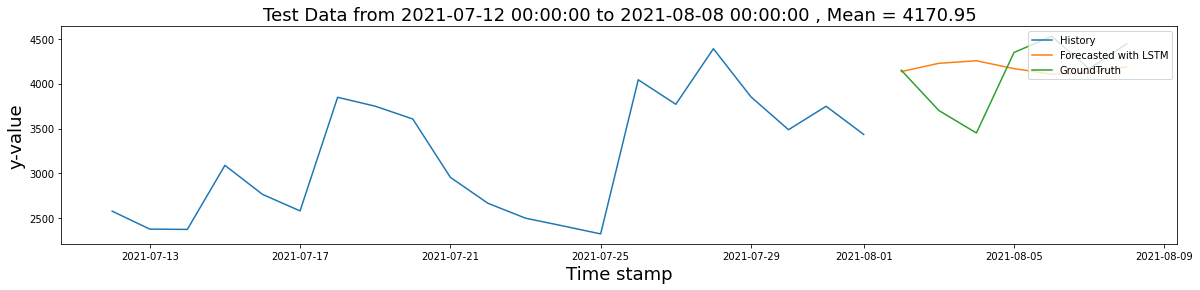

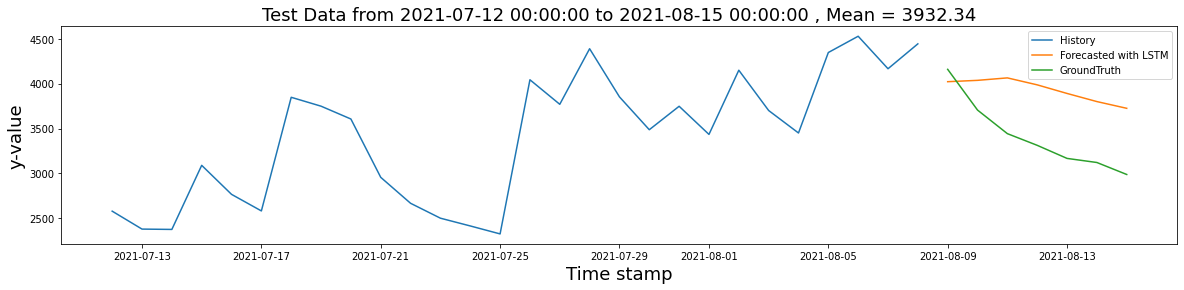

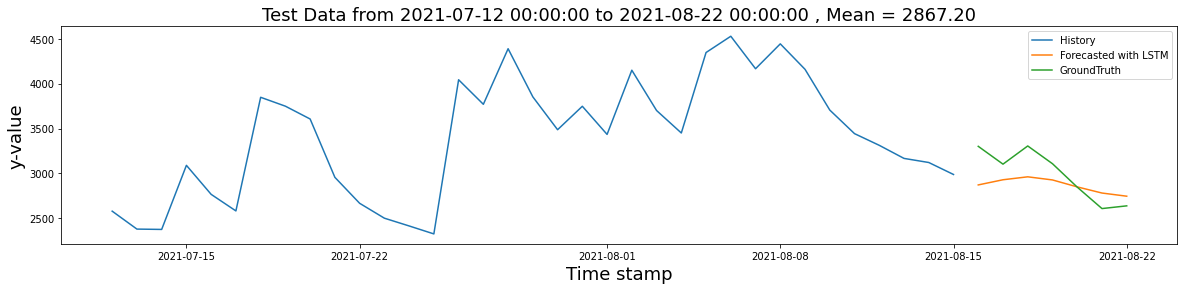

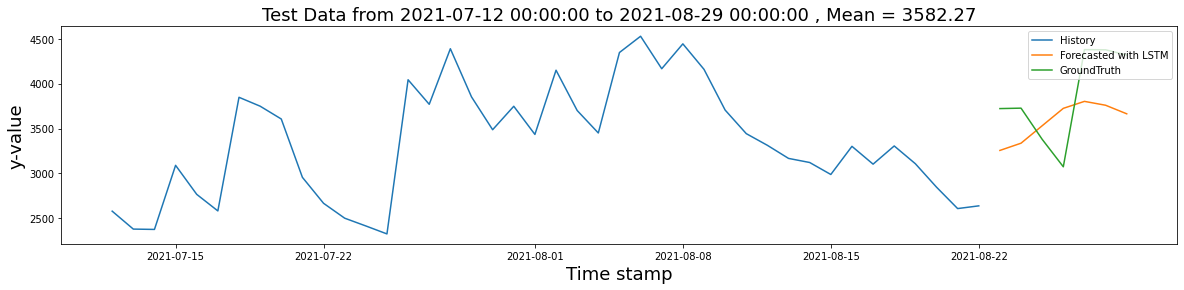

In [41]:
# all test batches

dfs2 = pd.DataFrame() # to save predictions
past = pd.DataFrame() # to save past data which is not used to evaluate metrics
error_metrics_2 = pd.DataFrame() # To save error metrics

for i in range(0,28,7):
    
    n_steps_in = 21
    n_steps_out = 7
    start = i
    end = start + n_steps_in 
    last = end + n_steps_out 
    
    # prepare data for time series sequence
    y_pred_inv , dataset_test_y , past_data = prep_data(test_scaled, y_test, start,
                                                        end, last, results2)
    # plot the sequence
    plot_multistep(past_data , y_pred_inv , dataset_test_y , start , end)
    
    # calculate errors and then return dataframe
    errors = evaluate_prediction(y_pred_inv , dataset_test_y, 'LSTM' , dataset_test_y.index[0],
                                 dataset_test_y.index[-1])
    
    
    # concat with previour error data frames
    error_metrics_2 = pd.concat([error_metrics_2, errors], ignore_index=False)
    
    # save past data
    past = pd.DataFrame()
    past["past"] = past_data
    
    # concat with previour past data frames
    past = pd.concat([past], ignore_index=False)
    
    # create data to save multiple colums
    d = pd.DataFrame()
    d["Ground Truth"] = dataset_test_y
    d["Predictions"] = y_pred_inv
    
    # concat with outside dataframe to save all results
    dfs2 = pd.concat([dfs2, d], ignore_index=False)

# Now merge past and predictions dataframe on date column
all_data2 = past.merge(dfs2, right_index=True, left_index=True, how="outer")  

In [42]:
all_data2.to_csv(os.path.join(forecast, "mm_lstm_d_2.csv"))

In [43]:
fig2 = px.line(all_data2, x=all_data2.index, y=["past", "Ground Truth", "Predictions"])

fig2.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label='1 Week', step='day', stepmode='backward'),
            dict(count=14, label='2 Weeks', step='day', stepmode='backward'),
            dict(count=21, label='3 Weeks', step='day', stepmode='backward'),
            dict(step='all')
            ])
    )
)

# Show plot 
fig2.show()

In [44]:
error_metrics_2

MSE        RMSE  \
2021-08-02 00:00:00 : 2021-08-08 00:00:00  171565.912644  414.205158   
2021-08-09 00:00:00 : 2021-08-15 00:00:00  356385.225598  596.980088   
2021-08-16 00:00:00 : 2021-08-22 00:00:00   58174.843700  241.194618   
2021-08-23 00:00:00 : 2021-08-29 00:00:00  279689.781476  528.857052   

                                                  MAE       R^2  
2021-08-02 00:00:00 : 2021-08-08 00:00:00  321.259025 -0.265877  
2021-08-09 00:00:00 : 2021-08-15 00:00:00  557.429999 -1.547732  
2021-08-16 00:00:00 : 2021-08-22 00:00:00  201.606355  0.205990  
2021-08-23 00:00:00 : 2021-08-29 00:00:00  500.955409 -0.199964

## Model 3: Using past 14 days Kw values to predict future kw values

In [45]:
x1 = df["kw"]
y = df["kw"].values

X, Y = prepare_time_series(x1.values.reshape(-1, 1), y)

X_train, y_train, x_test, y_test = train_test_split(X, Y)

dataset_stacked.shape (4029, 2)
X.shape (4029, 1)
y.shape (4029,)
train_X.shape (3602, 21, 1)
train_y.shape (3602, 7)
test_X.shape (401, 21, 1)
test_y.shape (401, 7)
n_features 1


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 21, 50)            10400     
_________________________________________________________________
dropout_28 (Dropout)         (None, 21, 50)            0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_29 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 357       
Total params: 30,957
Trainable params: 30,957
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
22/22 [==============================] - 3s 31ms/step - loss: 0.0184 - root_mean_squared_error: 0.1358 -

22/22 [==============================] - 0s 7ms/step - loss: 0.0058 - root_mean_squared_error: 0.0762 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1189
Epoch 44/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0059 - root_mean_squared_error: 0.0766 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1191
Epoch 45/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0057 - root_mean_squared_error: 0.0752 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1158
Epoch 46/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0054 - root_mean_squared_error: 0.0732 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1169
Epoch 47/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0056 - root_mean_squared_error: 0.0751 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1193
Epoch 48/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0056 - root_mean_squared_error: 0.0746 - val_loss: 0.0138 - val_root_mean_squared_

22/22 [==============================] - 0s 7ms/step - loss: 0.0117 - root_mean_squared_error: 0.1080 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1160
Epoch 36/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0115 - root_mean_squared_error: 0.1072 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1150
Epoch 37/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0116 - root_mean_squared_error: 0.1077 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1154
Epoch 38/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0115 - root_mean_squared_error: 0.1071 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1150
Epoch 39/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0118 - root_mean_squared_error: 0.1084 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1139
Epoch 40/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0115 - root_mean_squared_error: 0.1072 - val_loss: 0.0128 - val_root_mean_squared_

22/22 [==============================] - 0s 6ms/step - loss: 0.0079 - root_mean_squared_error: 0.0888 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1131
Epoch 28/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0083 - root_mean_squared_error: 0.0912 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1120
Epoch 29/50
22/22 [==============================] - 0s 6ms/step - loss: 0.0082 - root_mean_squared_error: 0.0907 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1133
Epoch 30/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0080 - root_mean_squared_error: 0.0896 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1130
Epoch 31/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0081 - root_mean_squared_error: 0.0898 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1138
Epoch 32/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0080 - root_mean_squared_error: 0.0895 - val_loss: 0.0129 - val_root_mean_squared_

19/19 [==============================] - 0s 7ms/step - loss: 0.0060 - root_mean_squared_error: 0.0772 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1141
Epoch 20/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0059 - root_mean_squared_error: 0.0771 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1194
Epoch 21/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0057 - root_mean_squared_error: 0.0757 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1157
Epoch 22/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0057 - root_mean_squared_error: 0.0754 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1155
Epoch 23/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0057 - root_mean_squared_error: 0.0754 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1166
Epoch 24/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0058 - root_mean_squared_error: 0.0761 - val_loss: 0.0136 - val_root_mean_squared_

19/19 [==============================] - 0s 7ms/step - loss: 0.0144 - root_mean_squared_error: 0.1200 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1167
Epoch 12/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0140 - root_mean_squared_error: 0.1185 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1192
Epoch 13/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0134 - root_mean_squared_error: 0.1159 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1155
Epoch 14/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0131 - root_mean_squared_error: 0.1143 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1147
Epoch 15/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0129 - root_mean_squared_error: 0.1135 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1149
Epoch 16/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0127 - root_mean_squared_error: 0.1129 - val_loss: 0.0131 - val_root_mean_squared_

19/19 [==============================] - 0s 7ms/step - loss: 0.0126 - root_mean_squared_error: 0.1120 - val_loss: 0.0180 - val_root_mean_squared_error: 0.1340
Epoch 4/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0121 - root_mean_squared_error: 0.1101 - val_loss: 0.0145 - val_root_mean_squared_error: 0.1206
Epoch 5/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0105 - root_mean_squared_error: 0.1024 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1210
Epoch 6/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0103 - root_mean_squared_error: 0.1016 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1188
Epoch 7/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0096 - root_mean_squared_error: 0.0982 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1202
Epoch 8/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0095 - root_mean_squared_error: 0.0974 - val_loss: 0.0140 - val_root_mean_squared_error

33/33 [==============================] - 3s 22ms/step - loss: 0.0297 - root_mean_squared_error: 0.1723 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1245
Epoch 2/50
33/33 [==============================] - 0s 6ms/step - loss: 0.0128 - root_mean_squared_error: 0.1133 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1212
Epoch 3/50
33/33 [==============================] - 0s 6ms/step - loss: 0.0110 - root_mean_squared_error: 0.1051 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1246
Epoch 4/50
33/33 [==============================] - 0s 6ms/step - loss: 0.0103 - root_mean_squared_error: 0.1014 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1184
Epoch 5/50
33/33 [==============================] - 0s 6ms/step - loss: 0.0099 - root_mean_squared_error: 0.0995 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1183
Epoch 6/50
33/33 [==============================] - 0s 6ms/step - loss: 0.0098 - root_mean_squared_error: 0.0990 - val_loss: 0.0137 - val_root_mean_squared_erro

33/33 [==============================] - 0s 6ms/step - loss: 0.0084 - root_mean_squared_error: 0.0915 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1184
Epoch 50/50
33/33 [==============================] - 0s 6ms/step - loss: 0.0085 - root_mean_squared_error: 0.0922 - val_loss: 0.0139 - val_root_mean_squared_error: 0.1177
Best: 0.801199 using {'n_neurons': 50, 'lr': 0.01, 'epochs': 200, 'batch_size': 112}
Mean: 0.801199 (Standard Deviation: 0.103910) with: {'n_neurons': 50, 'lr': 0.01, 'epochs': 200, 'batch_size': 112}
Mean: 0.784862 (Standard Deviation: 0.065924) with: {'n_neurons': 50, 'lr': 0.01, 'epochs': 200, 'batch_size': 128}


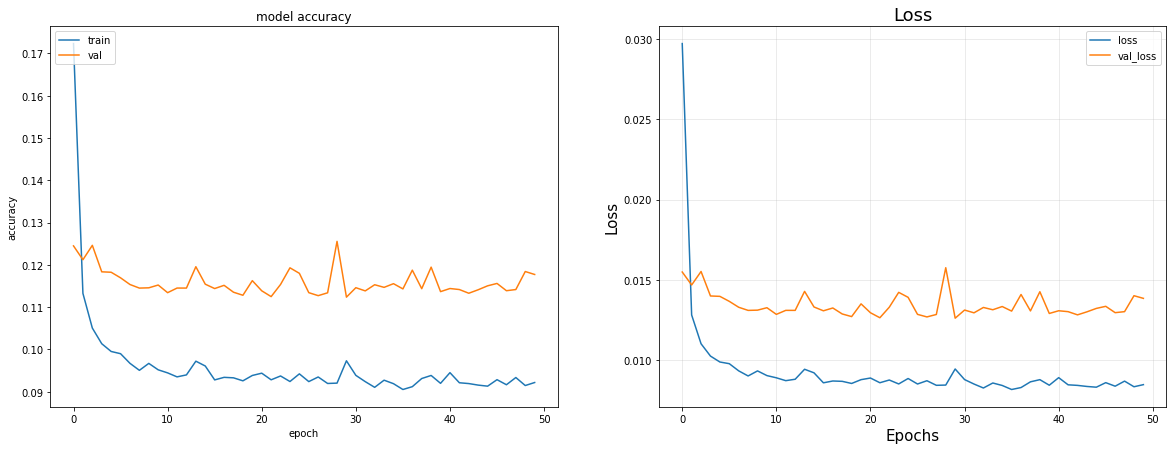

In [46]:
results3 = cross_validation(X_train, y_train, x_test, y_test)

In [47]:
# prepare test data

x_test = test_df['kw'].values.reshape(-1, 1)
y_test = test_df['kw'] 

scaler = MinMaxScaler(feature_range=(0, 1))

test_scaled = scaler.fit_transform(x_test)

Test Data from 2021-08-02 00:00:00 to 2021-08-08 00:00:00
Mean Square Error: 132161.95
Mean Absolute Error: 316.29
Root Mean Square Error: 363.54
R-Square: 0.02


Test Data from 2021-08-09 00:00:00 to 2021-08-15 00:00:00
Mean Square Error: 554422.68
Mean Absolute Error: 668.92
Root Mean Square Error: 744.60
R-Square: -2.96


Test Data from 2021-08-16 00:00:00 to 2021-08-22 00:00:00
Mean Square Error: 92067.04
Mean Absolute Error: 275.54
Root Mean Square Error: 303.43
R-Square: -0.26


Test Data from 2021-08-23 00:00:00 to 2021-08-29 00:00:00
Mean Square Error: 447598.33
Mean Absolute Error: 568.61
Root Mean Square Error: 669.03
R-Square: -0.92




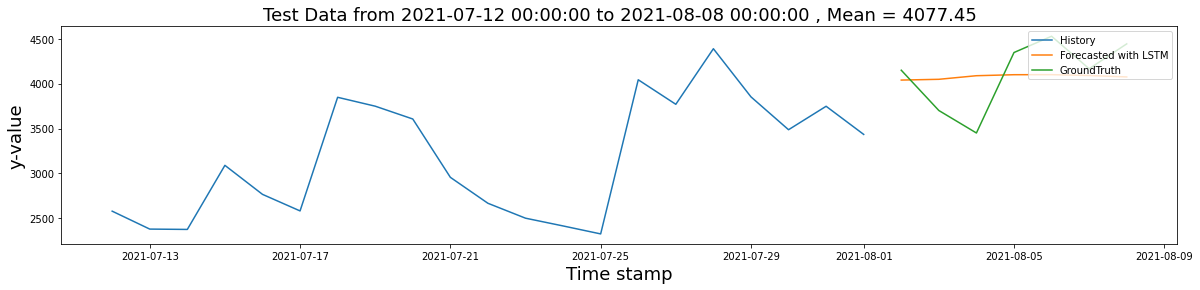

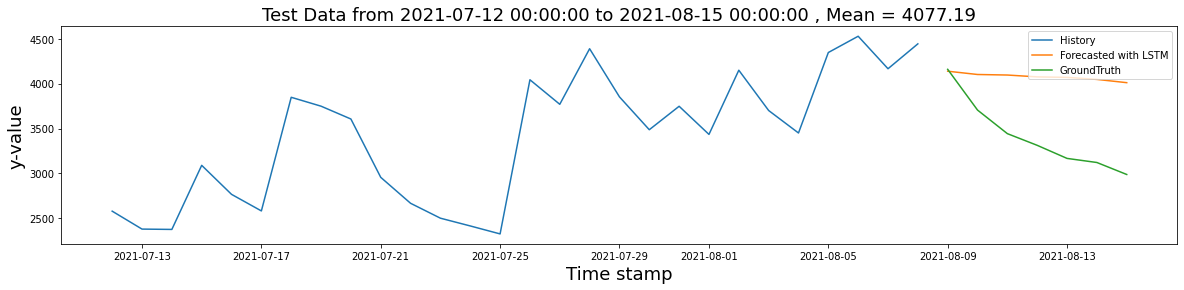

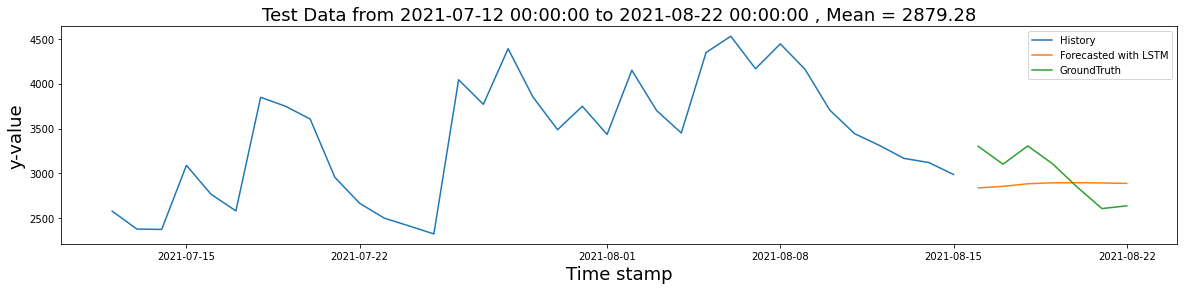

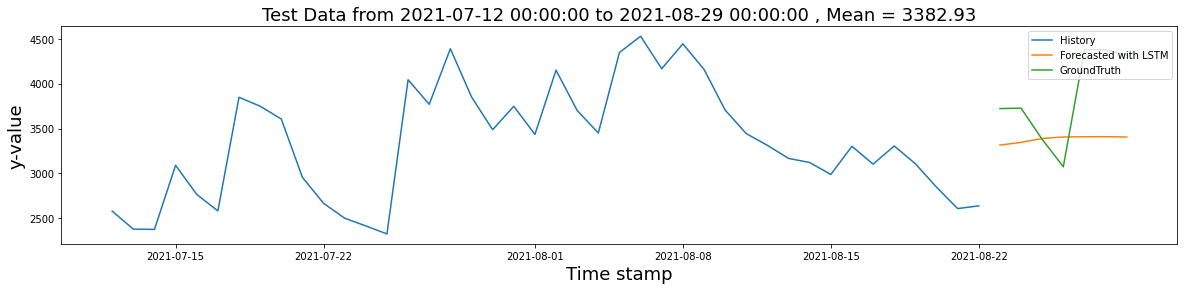

In [48]:
# all test batches

dfs3 = pd.DataFrame() # to save predictions
past = pd.DataFrame() # to save past data which is not used to evaluate metrics
error_metrics_3 = pd.DataFrame() # To save error metrics

for i in range(0,28,7):
    
    n_steps_in = 21
    n_steps_out = 7
    start = i
    end = start + n_steps_in 
    last = end + n_steps_out 
    
    # prepare data for time series sequence
    y_pred_inv , dataset_test_y , past_data = prep_data(test_scaled, y_test, start,
                                                        end, last, results3)
    # plot the sequence
    plot_multistep(past_data , y_pred_inv , dataset_test_y , start , end)
    
    # calculate errors and then return dataframe
    errors = evaluate_prediction(y_pred_inv , dataset_test_y, 'LSTM' , dataset_test_y.index[0],
                                 dataset_test_y.index[-1])
    
    
    # concat with previour error data frames
    error_metrics_3 = pd.concat([error_metrics_3, errors], ignore_index=False)
    
    # save past data
    past = pd.DataFrame()
    past["past"] = past_data
    
    # concat with previour past data frames
    past = pd.concat([past], ignore_index=False)
    
    # create data to save multiple colums
    d = pd.DataFrame()
    d["Ground Truth"] = dataset_test_y
    d["Predictions"] = y_pred_inv
    
    # concat with outside dataframe to save all results
    dfs3 = pd.concat([dfs3, d], ignore_index=False)

# Now merge past and predictions dataframe on date column
all_data3 = past.merge(dfs3, right_index=True, left_index=True, how="outer")  

In [49]:
all_data3.to_csv(os.path.join(forecast, "mm_lstm_d_1.csv"))

In [50]:
fig3 = px.line(all_data3, x=all_data3.index, y=["past", "Ground Truth", "Predictions"])

fig3.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label='1 Week', step='day', stepmode='backward'),
            dict(count=14, label='2 Weeks', step='day', stepmode='backward'),
            dict(count=21, label='3 Weeks', step='day', stepmode='backward'),
            dict(step='all')
            ])
    )
)

# Show plot 
fig3.show()

In [51]:
error_metrics_3

MSE        RMSE  \
2021-08-02 00:00:00 : 2021-08-08 00:00:00  132161.950341  363.540851   
2021-08-09 00:00:00 : 2021-08-15 00:00:00  554422.683676  744.595651   
2021-08-16 00:00:00 : 2021-08-22 00:00:00   92067.035047  303.425502   
2021-08-23 00:00:00 : 2021-08-29 00:00:00  447598.327513  669.027897   

                                                  MAE       R^2  
2021-08-02 00:00:00 : 2021-08-08 00:00:00  316.287973  0.024860  
2021-08-09 00:00:00 : 2021-08-15 00:00:00  668.916117 -2.963465  
2021-08-16 00:00:00 : 2021-08-22 00:00:00  275.541902 -0.256593  
2021-08-23 00:00:00 : 2021-08-29 00:00:00  568.606358 -0.920349

In [52]:
from ipylab import JupyterFrontEnd

app = JupyterFrontEnd()
app.commands.execute('docmanager:save')